In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)

#train_data = pd.read_csv("../input/train.csv") #reading the csv files using pandas
#test_data = pd.read_csv("../input/test.csv")

In [3]:
X[0,:].shape

(784,)

9


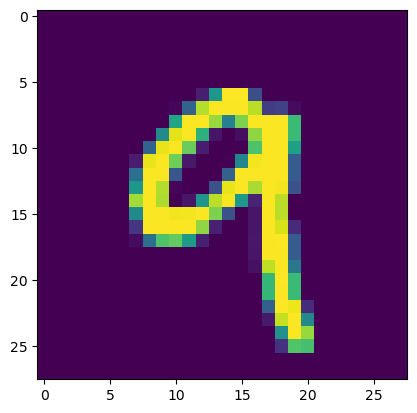

In [4]:
plt.imshow(X[110,:].reshape(28,28))
print(y[110])

In [5]:
np.unique(X[0,:])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255])

In [6]:
X = X/255.0

### Q1
whiten the data using function from sklearn.preprocessing
whiten is mean 0 and var 1

In [35]:
# whiten the data 



In [29]:
squarer = lambda t: int(t)
vfunc = np.vectorize(squarer)
y = vfunc(y)

In [30]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

In [36]:
#Fill in
def train_and_test_split(X,y):
    
    return X_train,y_train,X_test,y_test

In [32]:
X_train,y_train,X_test,y_test = train_and_test_split(X_scaled,y)

6


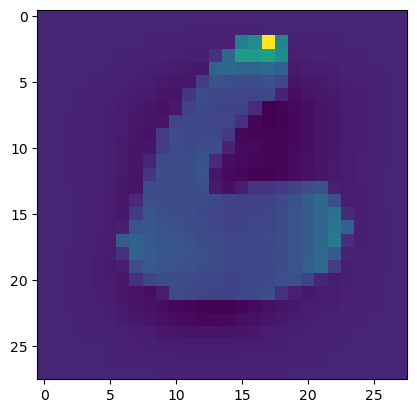

In [33]:
plt.imshow(X_train[0,:].reshape(28,28))
print(y_train[0])

In [13]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
y_pred = model_linear.predict(X_test)


9 9


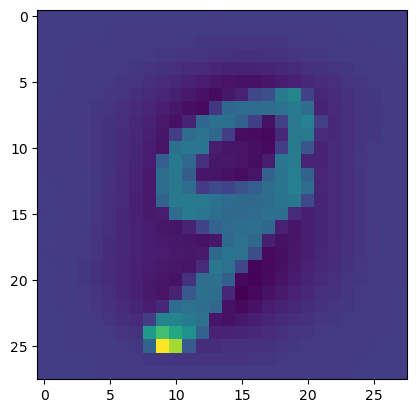

In [15]:
plt.imshow(X_test[10,:].reshape(28,28))
print(y_test[10],y_pred[10])

In [16]:
np.count_nonzero(y_pred!=y_test)

1652

### Q2
use sklearn.metrics to get accuracy score and confusion matrix 

In [37]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [18]:
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

### Q3
Use PCA from sklearn.decomposition to reduce dimensionality of feature space.
reduce to 256 features
and then train and do evaluation

In [20]:
from sklearn.decomposition import PCA